The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

6. Number of Attributes: 16 + output attribute.

7. Attribute information:



# Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [1]:
##importing libraries
import numpy as np  #importinglinear algebra
import pandas as pd #importing data processing lib
import matplotlib.pyplot as plt   #data visualization
import seaborn as sns   #data visualization
%matplotlib inline  #visualization
import warnings   #to avoid the warnings
warnings.filterwarnings('ignore')

UsageError: unrecognized arguments: #visualization


In [2]:
df=pd.read_csv(r"E:\bank\bank-full.csv",sep=';')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
#checking shape
df.shape

(45211, 17)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Observation:there 7 int types and and 10 object types,
now we have to convert the object types into numeric values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
#to check missing value in data (2 methods)
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no null values present

In [346]:
#checking the distribution of output 
print("  Output variable (desired target):\n",df.y.value_counts())

  Output variable (desired target):
 no     39922
yes     5289
Name: y, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


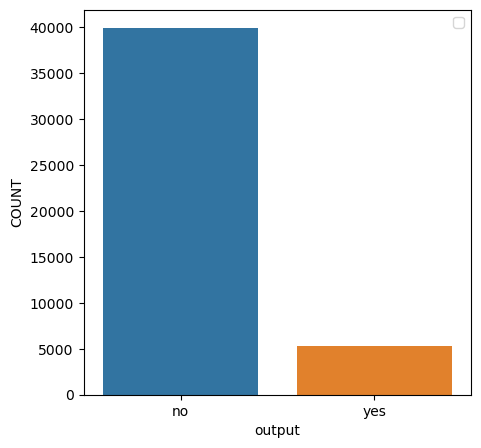

In [10]:
plt.subplots(figsize=(5,5))
sns.countplot(x='y',data=df)
plt.xlabel('output')
plt.ylabel('COUNT')
plt.legend()
plt.show()

In [11]:
#checking the distribution of output by per
df['y'].value_counts(normalize=True)*100

no     88.30152
yes    11.69848
Name: y, dtype: float64

# SummaryStatistics


In [17]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [18]:
#checking correalation
corr=df.corr()

In [19]:
corr


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


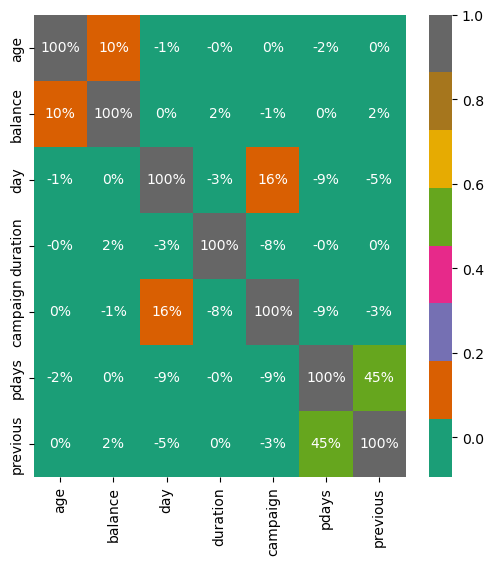

In [20]:
#heatmap to show the correaltion
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True,fmt=".0%",cmap='Dark2')
plt.show()

Observations:[1]day and campaign are correlated with each other
[2]balance and age are correleted with each other
[3]pdays and previous are highly correleted with each other

# Data Vizualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


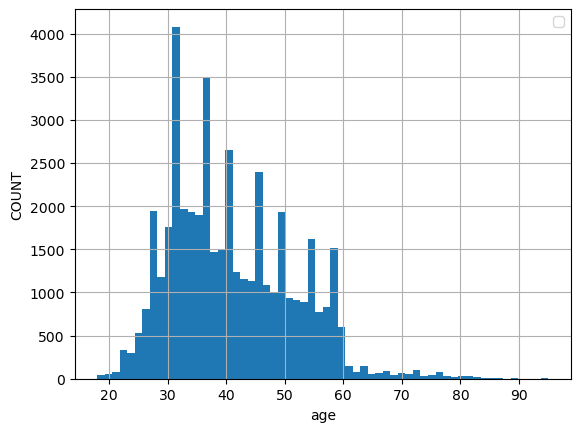

In [16]:
COST=df['age'].hist(bins=60)
mean_val=np.mean(df['age'])
plt.xlabel('age')
plt.ylabel('COUNT')
plt.legend()
plt.show()

Observation:As we can see there are more people btw age group of 30 and 60

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


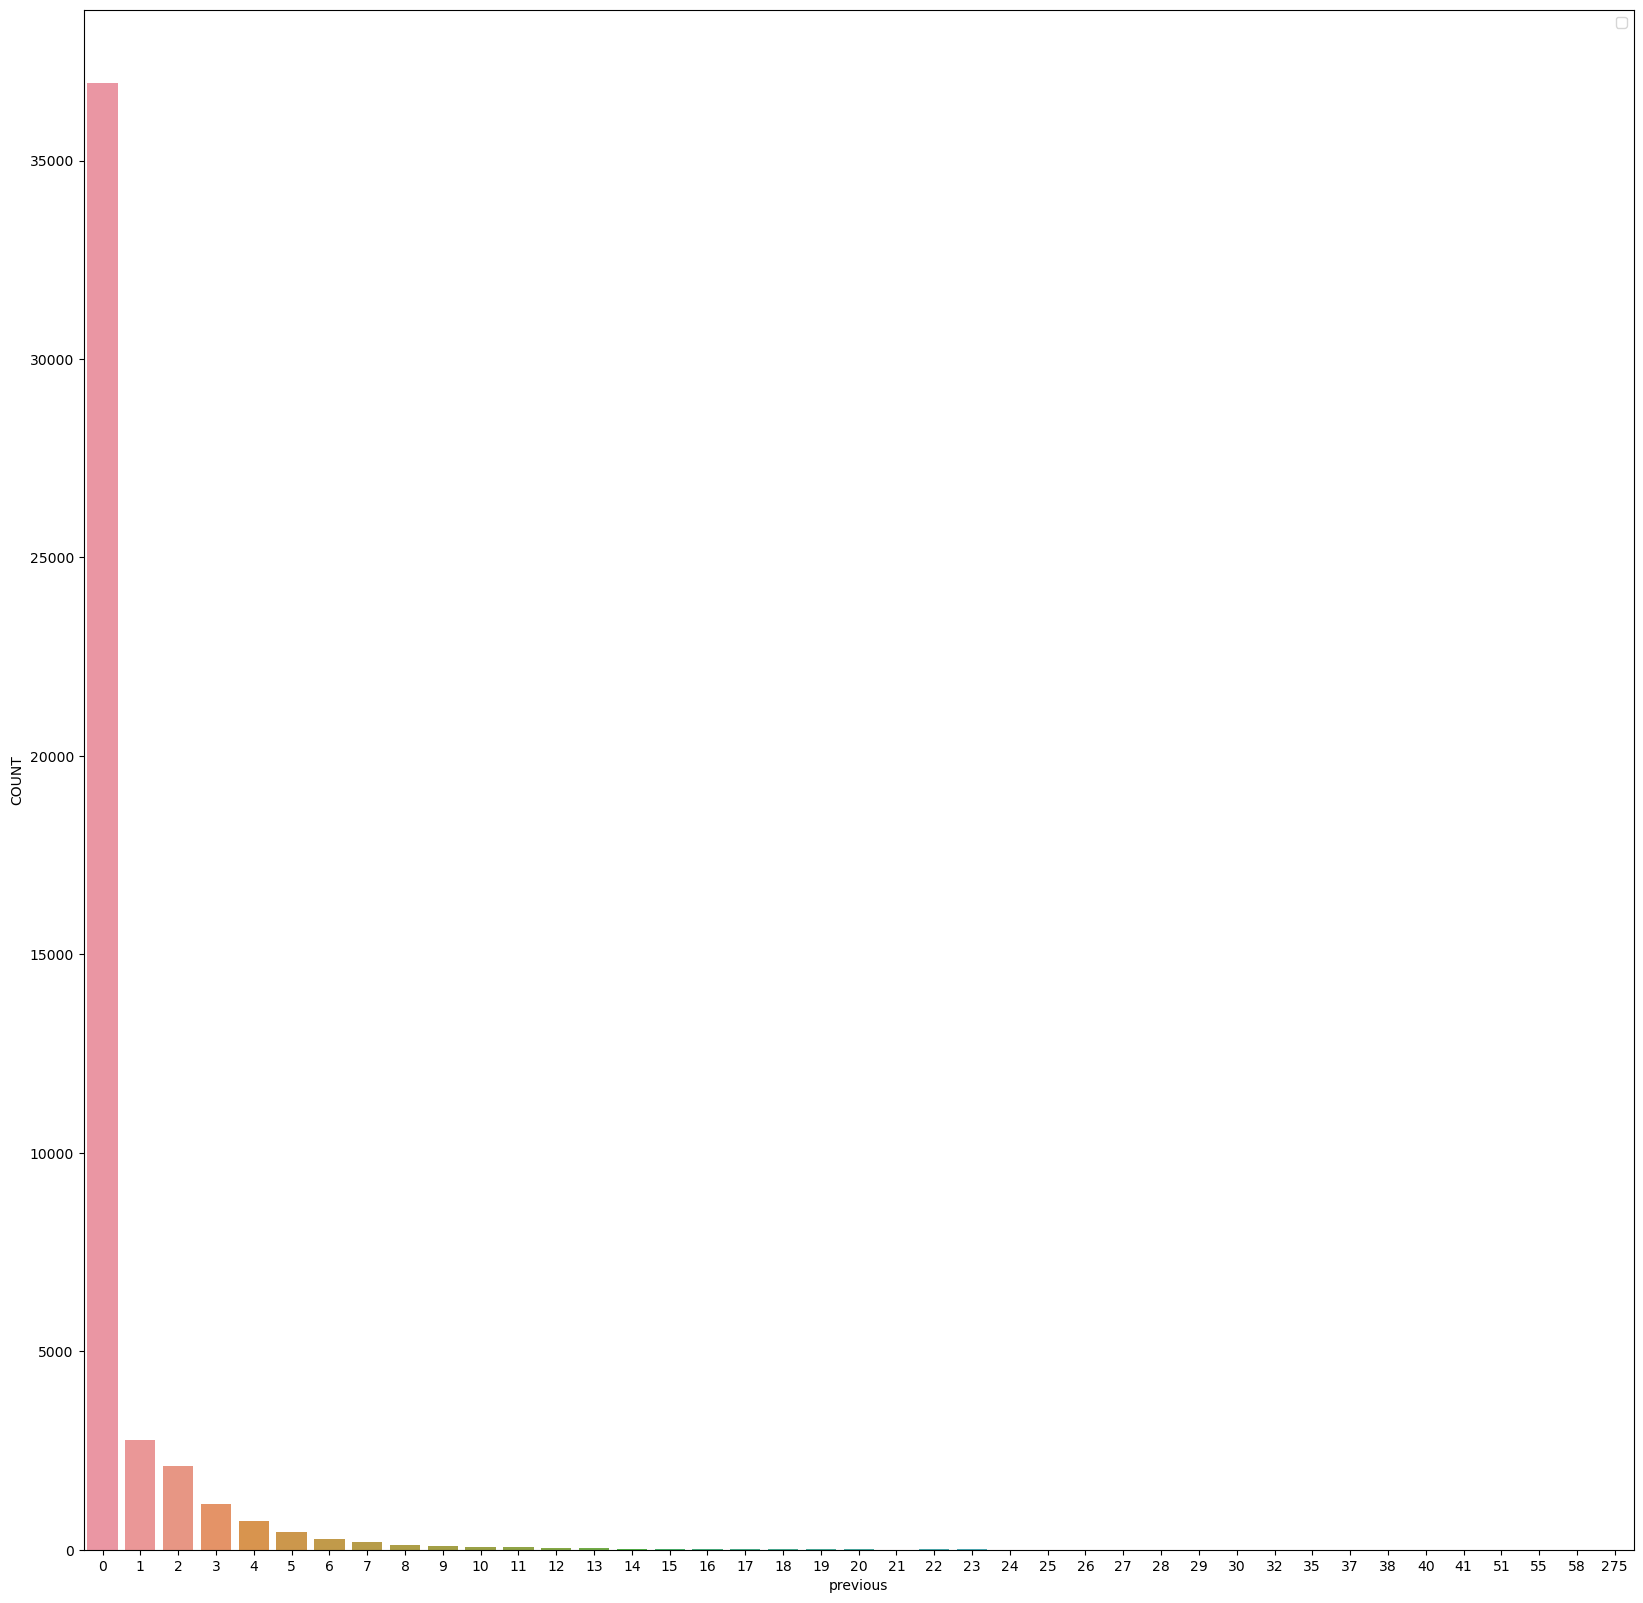

In [21]:
plt.subplots(figsize=(20,20))
sns.countplot(x='previous',data=df)
plt.xlabel('previous')
plt.ylabel('COUNT')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


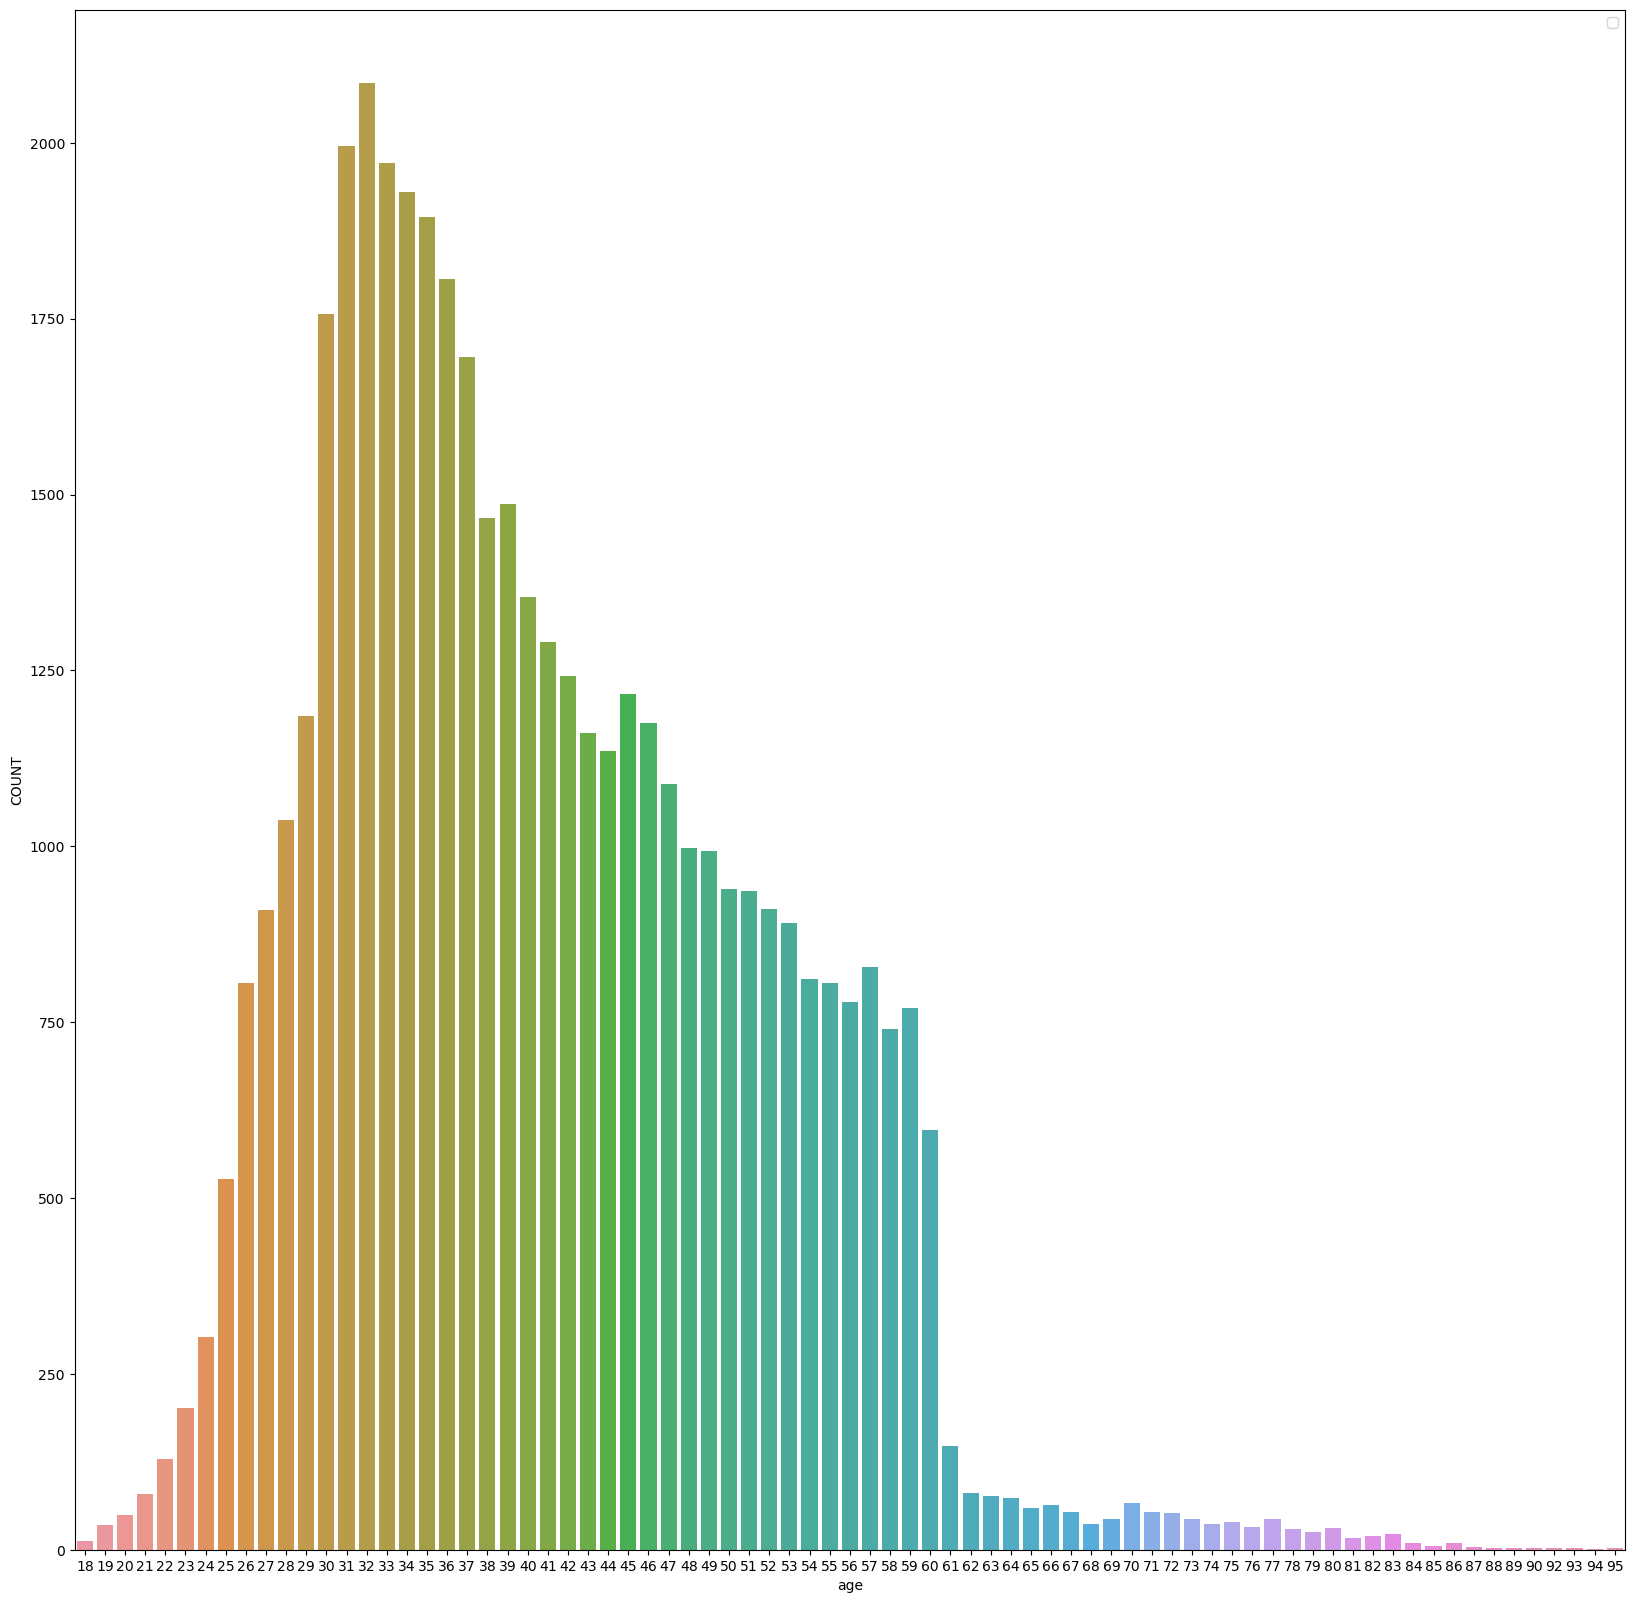

In [22]:
plt.subplots(figsize=(20,20))
sns.countplot(x='age',data=df)
plt.xlabel('age')
plt.ylabel('COUNT')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


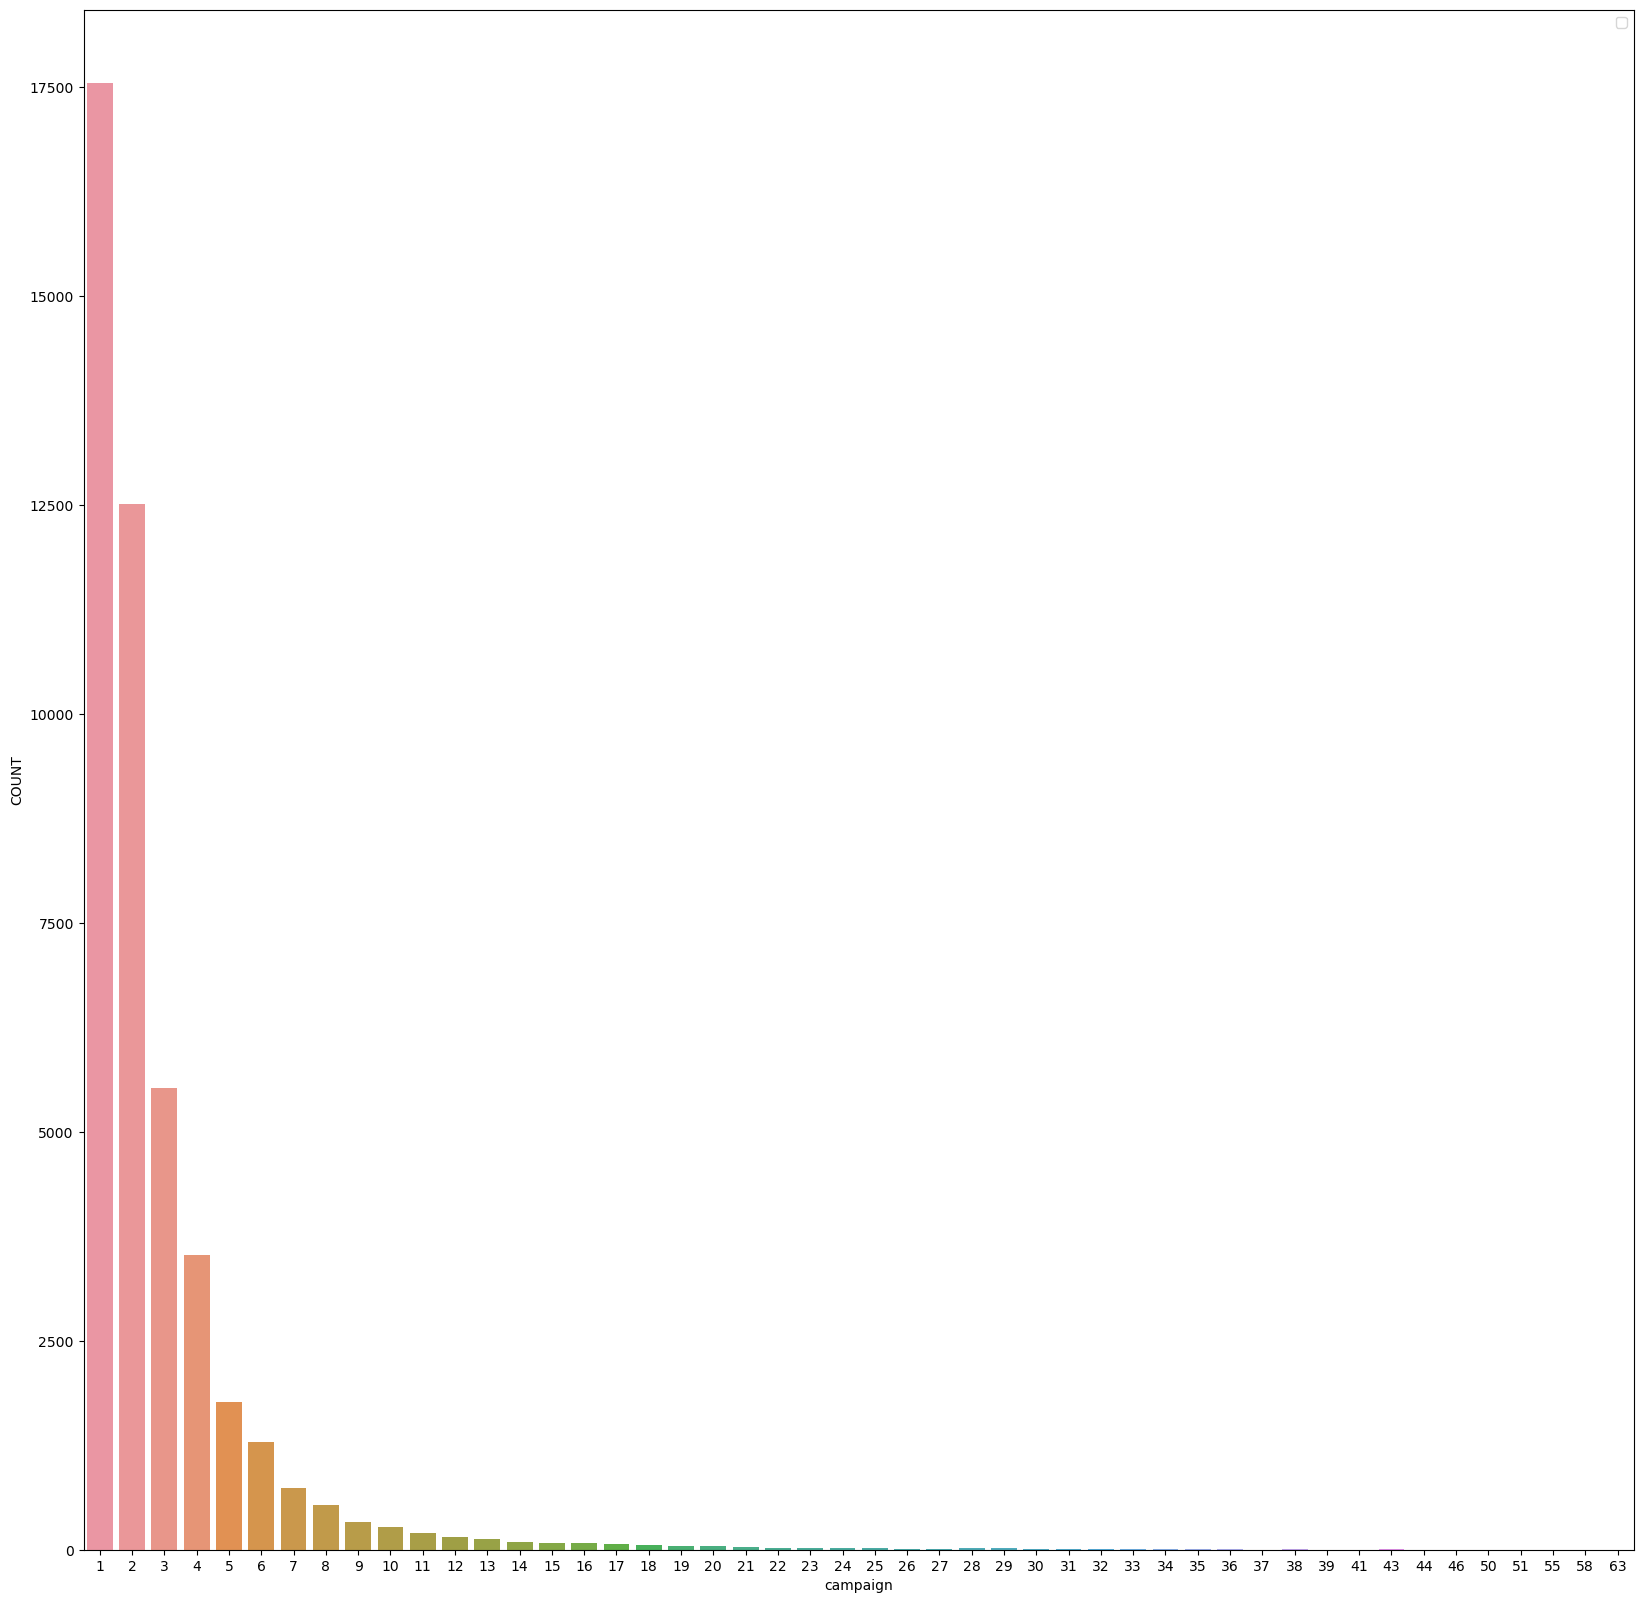

In [23]:
plt.subplots(figsize=(20,20))
sns.countplot(x='campaign',data=df)
plt.xlabel('campaign')
plt.ylabel('COUNT')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


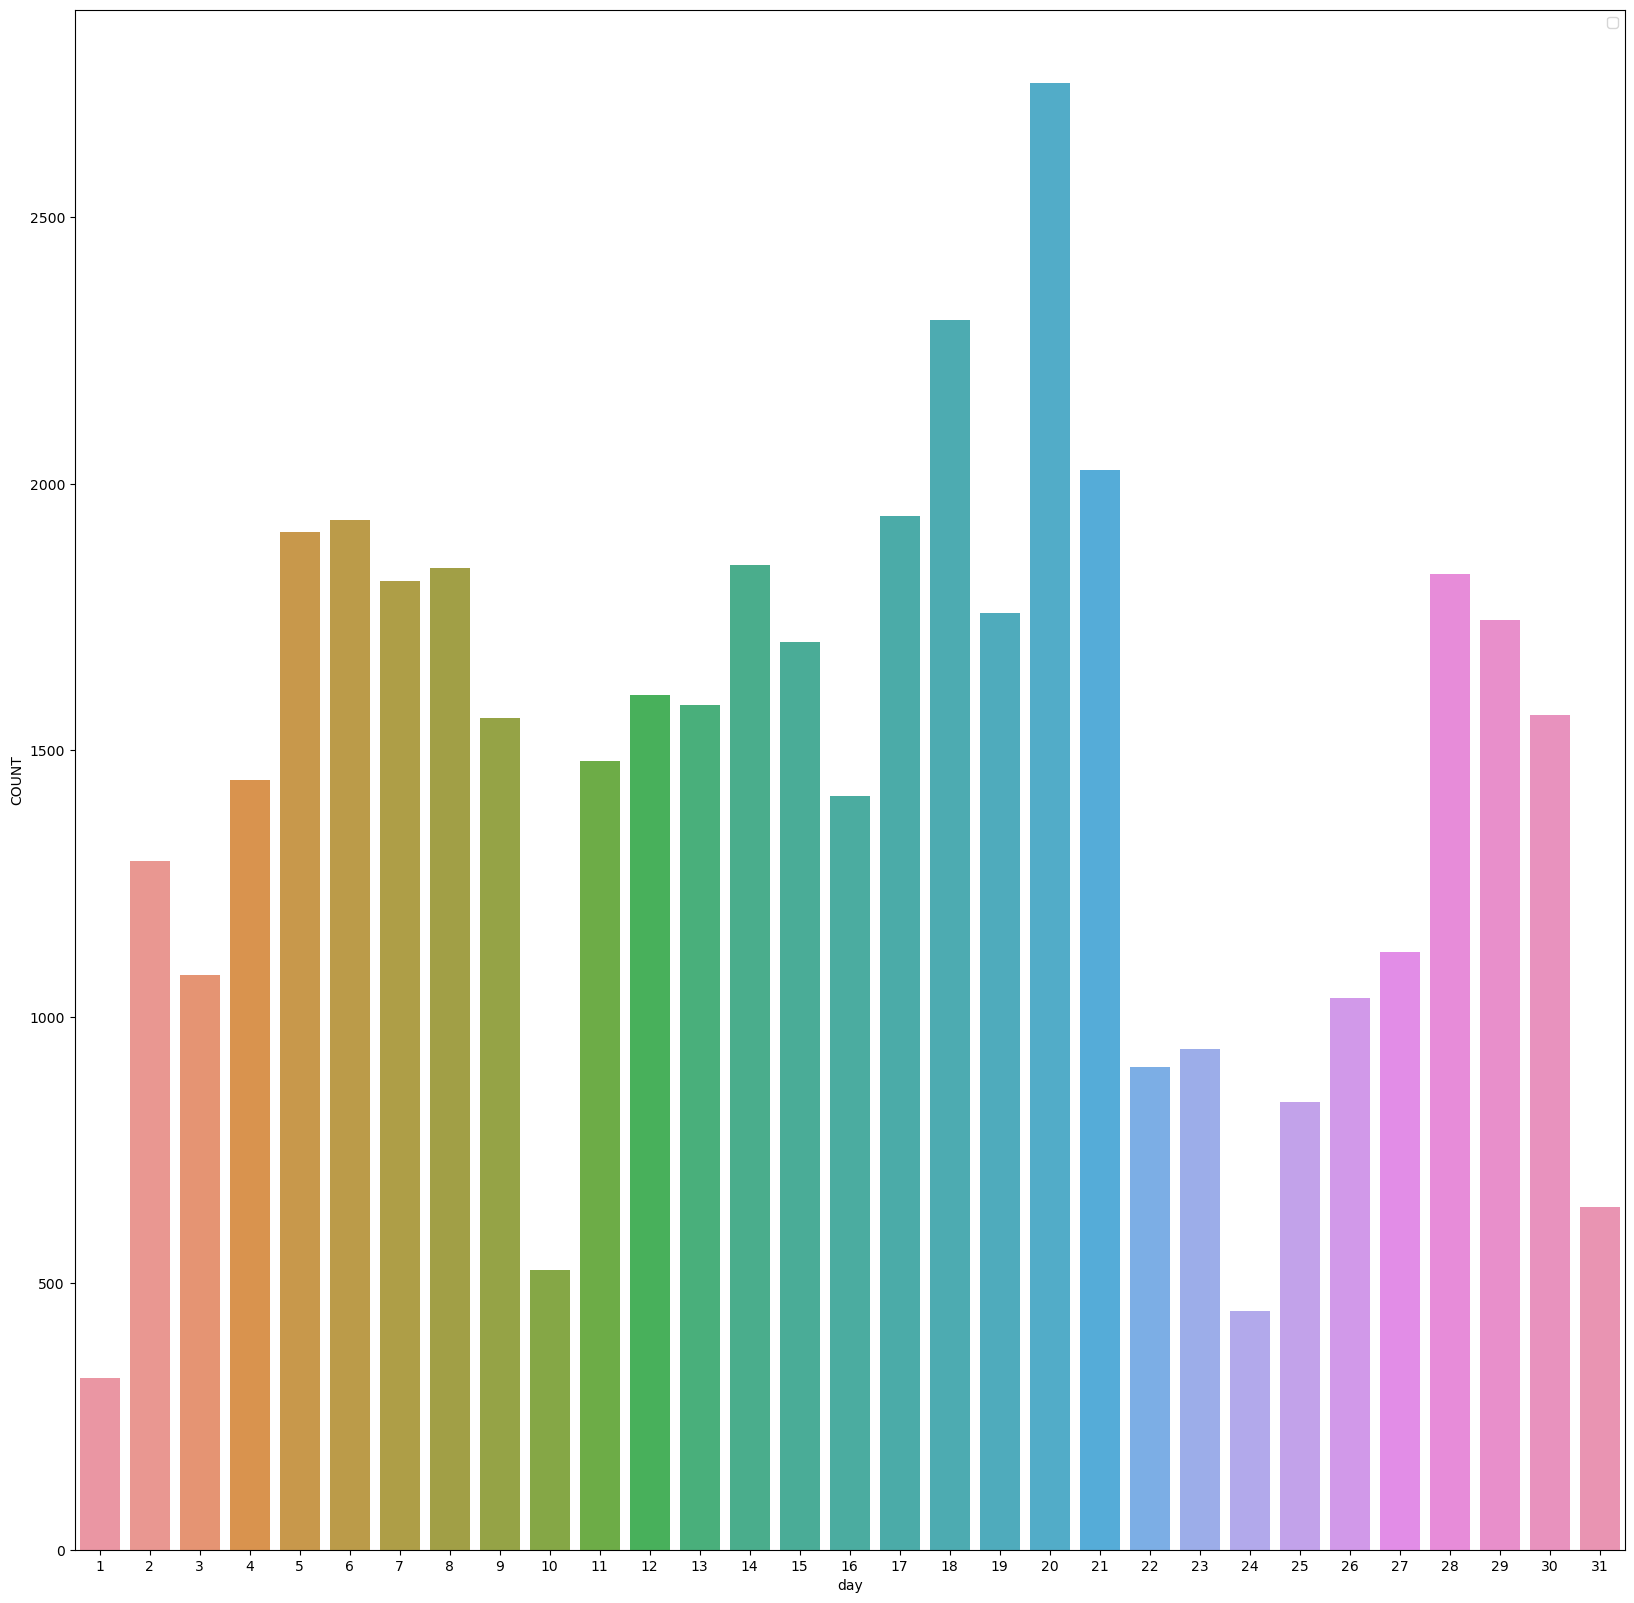

In [24]:
plt.subplots(figsize=(20,20))
sns.countplot(x='day',data=df)
plt.xlabel('day')
plt.ylabel('COUNT')
plt.legend()
plt.show()

Observation[1]The count increses in mid month like 15-22

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


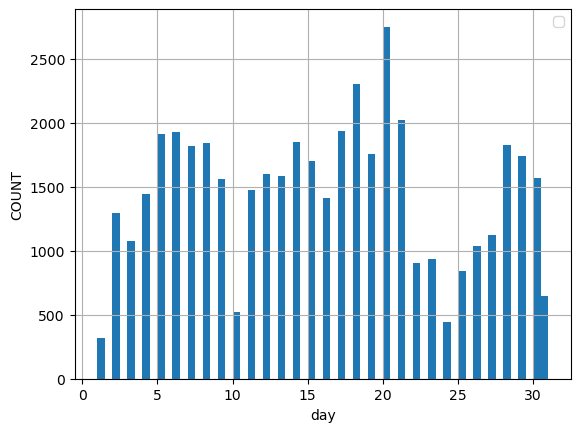

In [25]:
COST=df['day'].hist(bins=60)
mean_val=np.mean(df['day'])
plt.xlabel('day')
plt.ylabel('COUNT')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


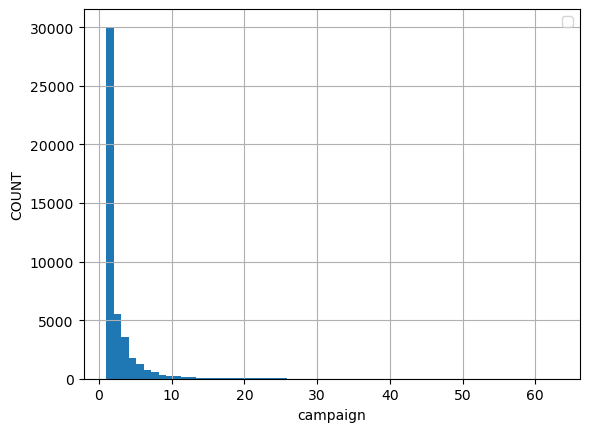

In [26]:
COST=df['campaign'].hist(bins=60)
mean_val=np.mean(df['campaign'])
plt.xlabel('campaign')
plt.ylabel('COUNT')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


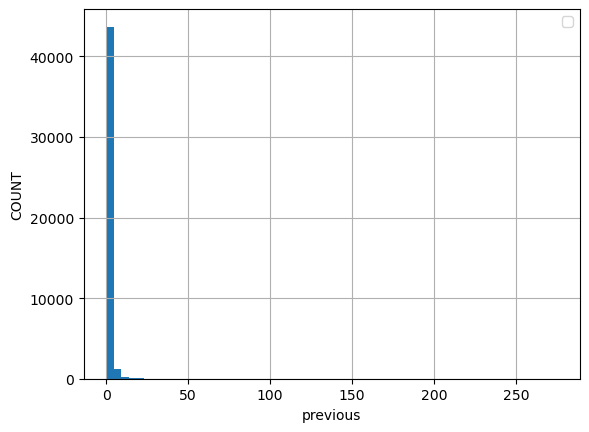

In [27]:
COST=df['previous'].hist(bins=60)
mean_val=np.mean(df['previous'])
plt.xlabel('previous')
plt.ylabel('COUNT')
plt.legend()
plt.show()

# Now we are moving to categorical data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


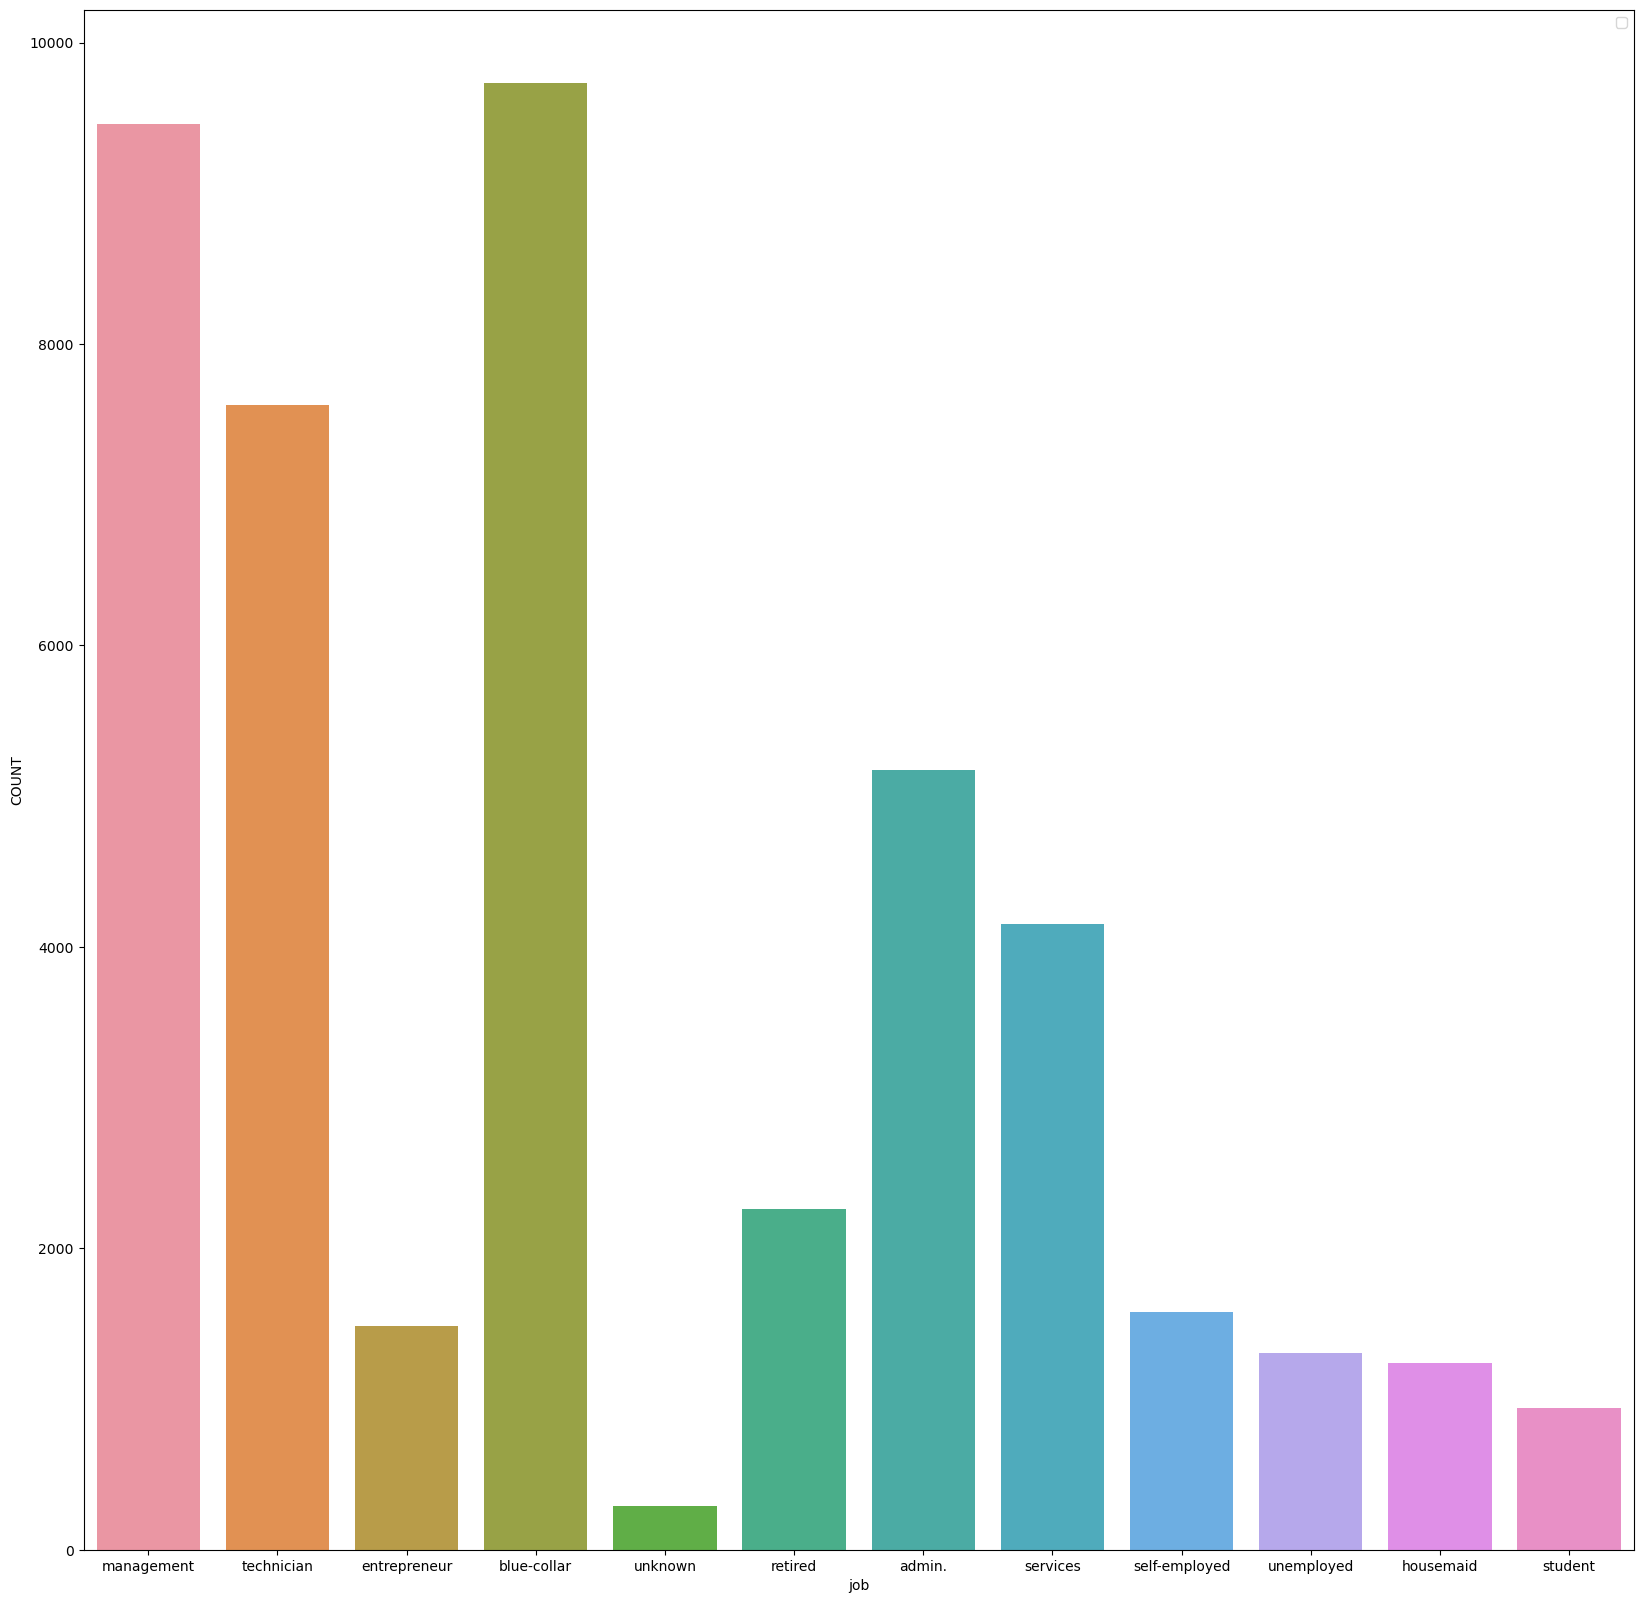

In [360]:
plt.subplots(figsize=(20,20))
sns.countplot(x='job',data=df)
plt.xlabel('job')
plt.ylabel('COUNT')
plt.legend()
plt.show()

Observation:people have blue-collor job and managment job are more

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


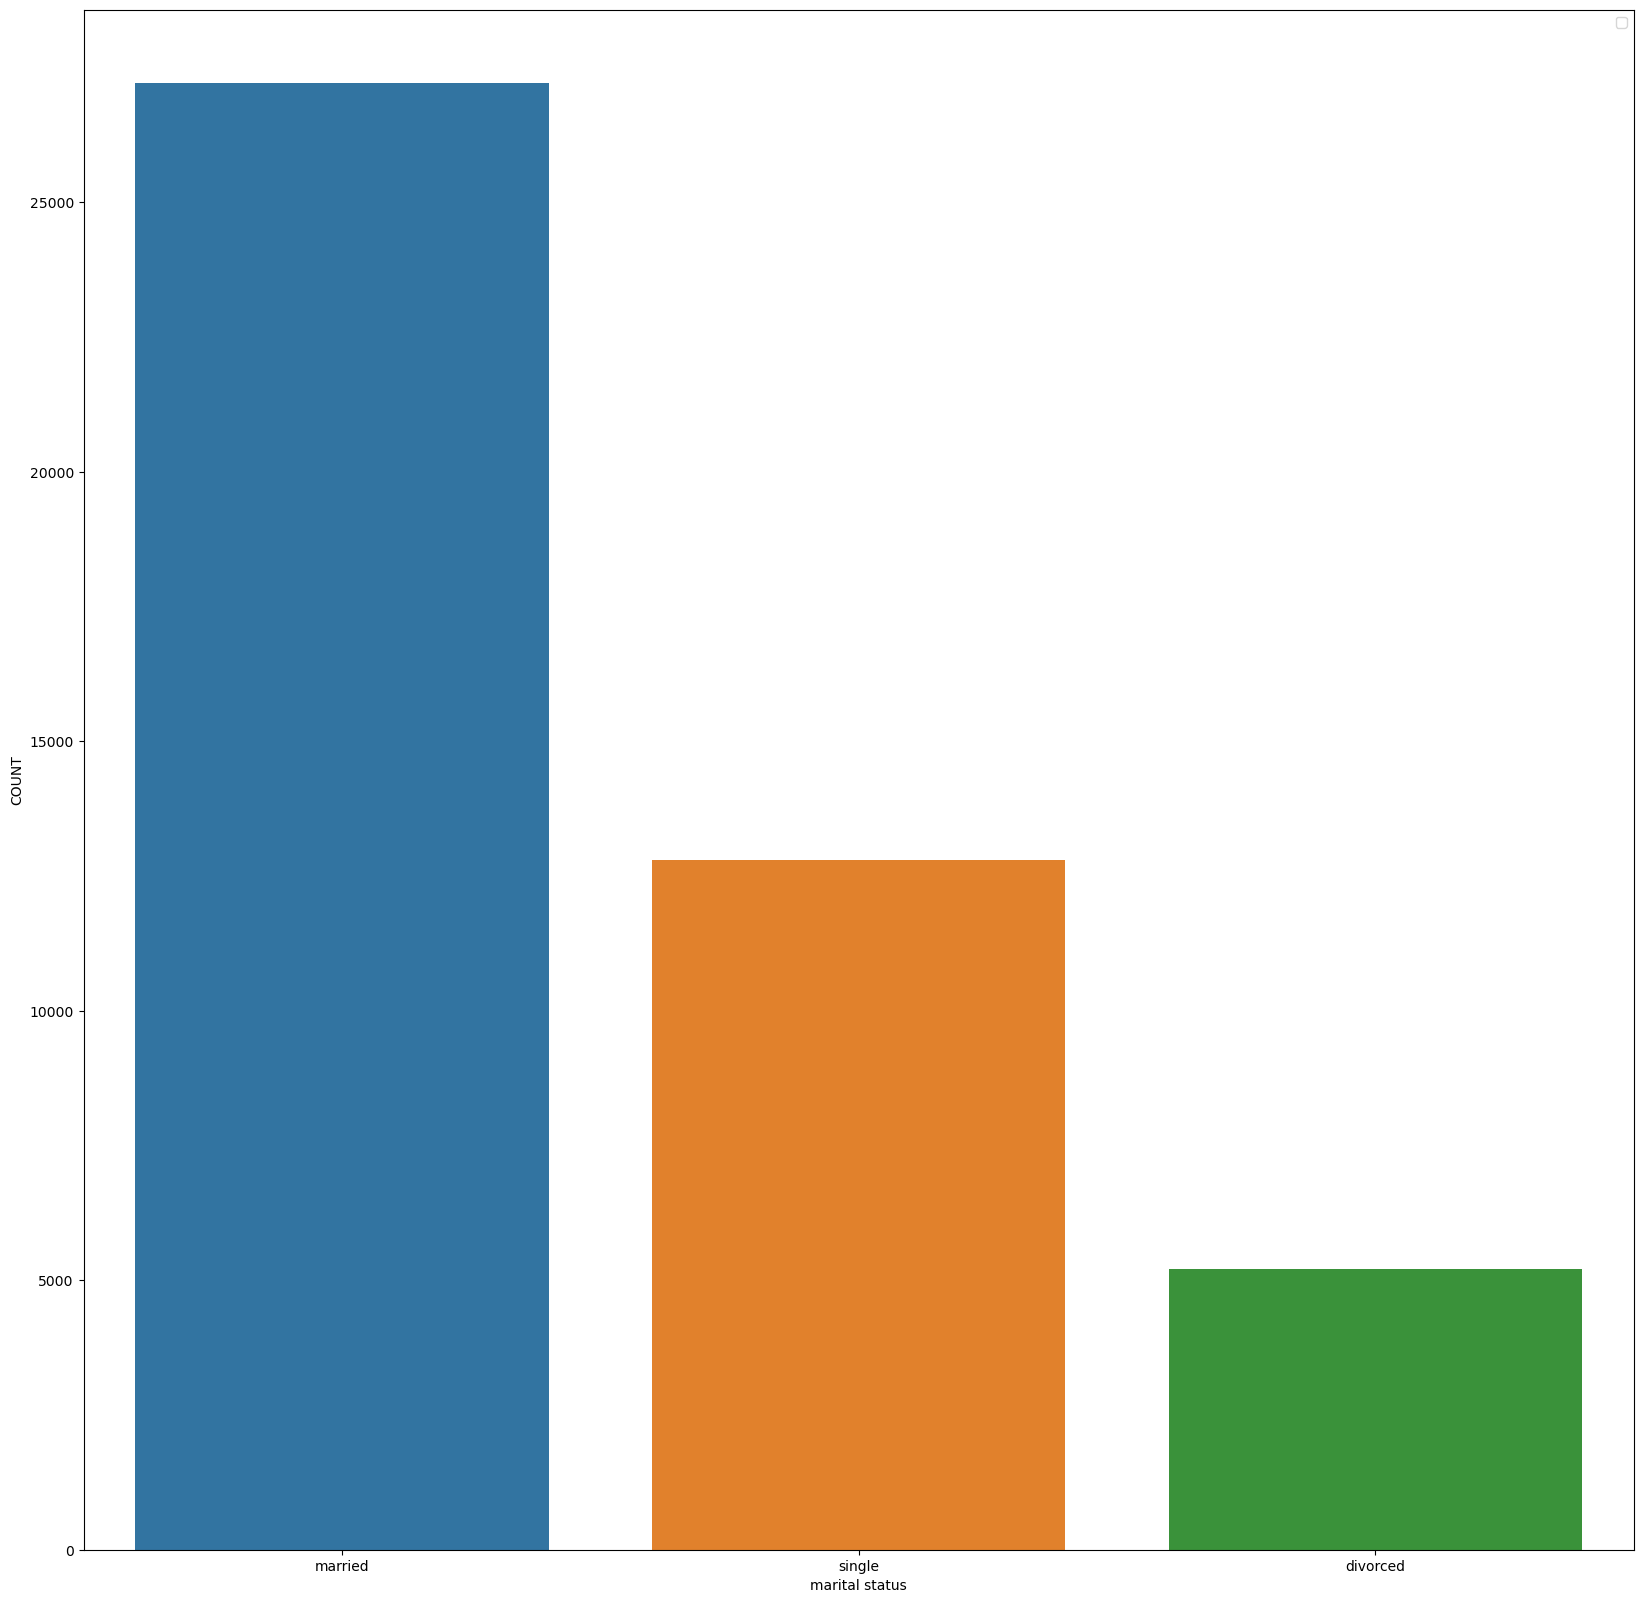

In [28]:
plt.subplots(figsize=(20,20))
sns.countplot(x='marital',data=df)
plt.xlabel('marital status')
plt.ylabel('COUNT')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


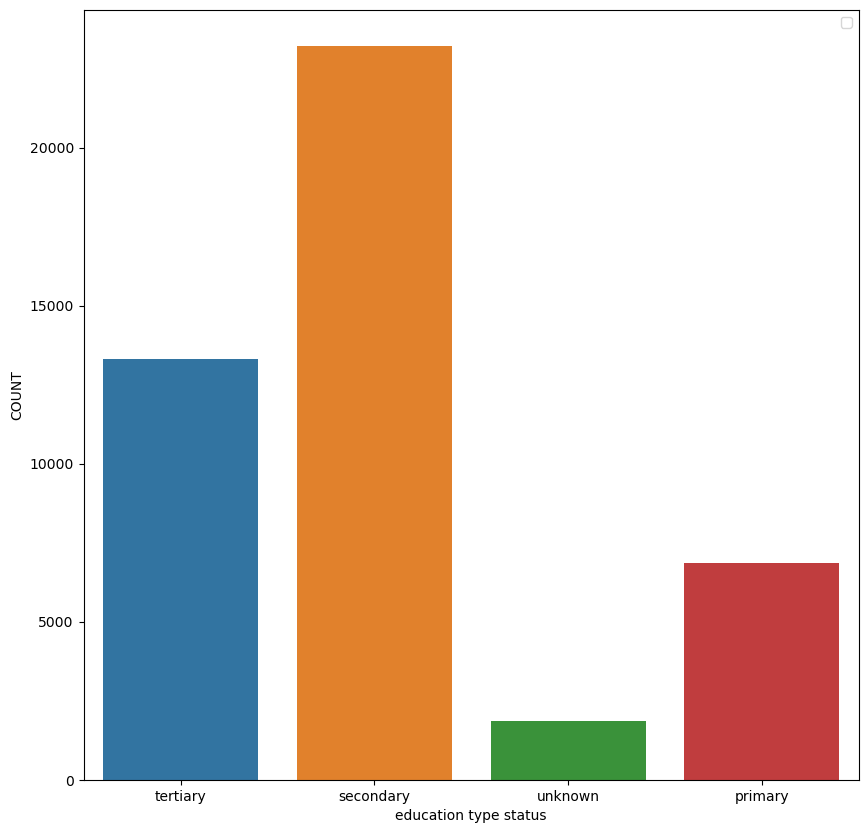

In [29]:
plt.subplots(figsize=(10,10))
sns.countplot(x='education',data=df)
plt.xlabel('education type status')
plt.ylabel('COUNT')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


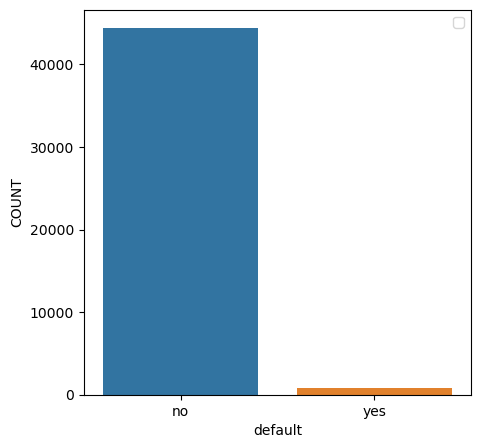

In [31]:
plt.subplots(figsize=(5,5))
sns.countplot(x='default',data=df)
plt.xlabel('default')
plt.ylabel('COUNT')
plt.legend()
plt.show()

There are less number of defaulter

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


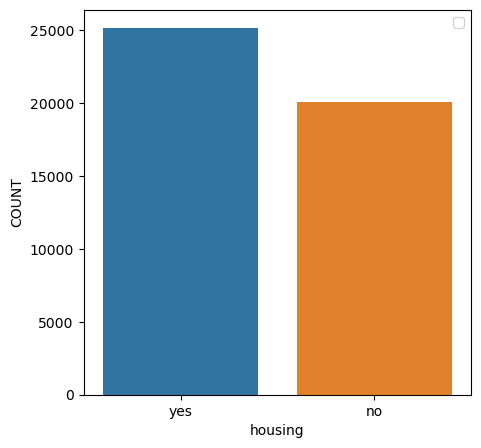

In [32]:
plt.subplots(figsize=(5,5))
sns.countplot(x='housing',data=df)
plt.xlabel('housing')
plt.ylabel('COUNT')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


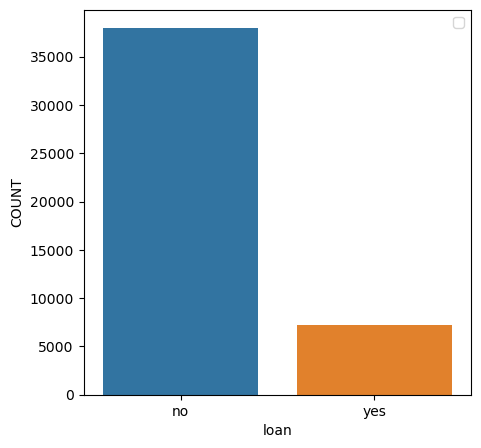

In [33]:
plt.subplots(figsize=(5,5))
sns.countplot(x='loan',data=df)
plt.xlabel('loan')
plt.ylabel('COUNT')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


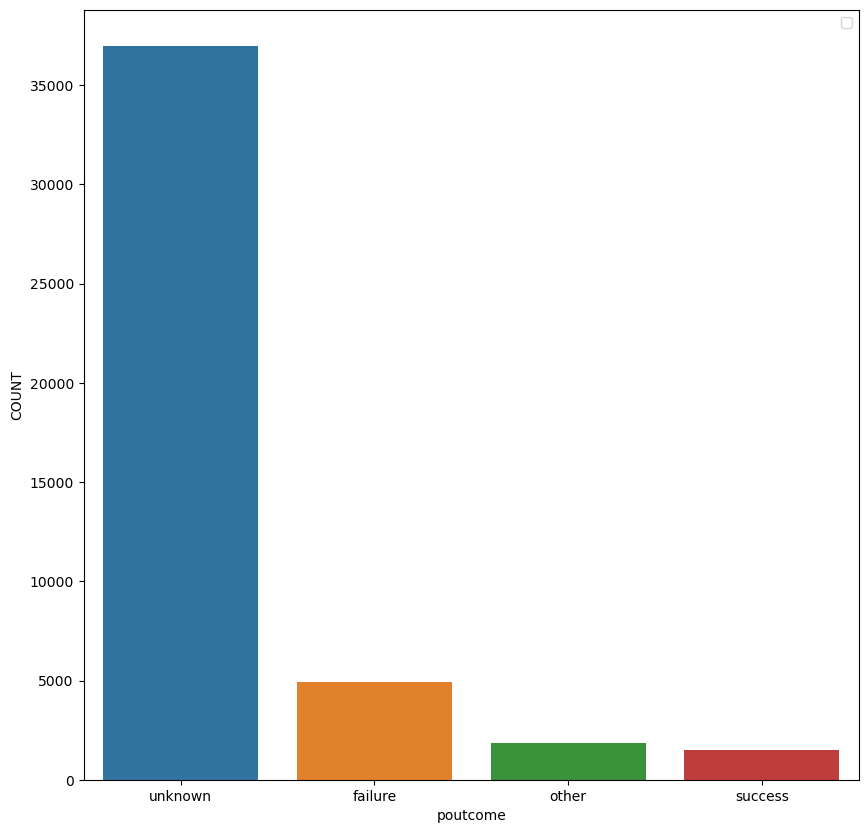

In [34]:
plt.subplots(figsize=(10,10))
sns.countplot(x='poutcome',data=df)
plt.xlabel('poutcome')
plt.ylabel('COUNT')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


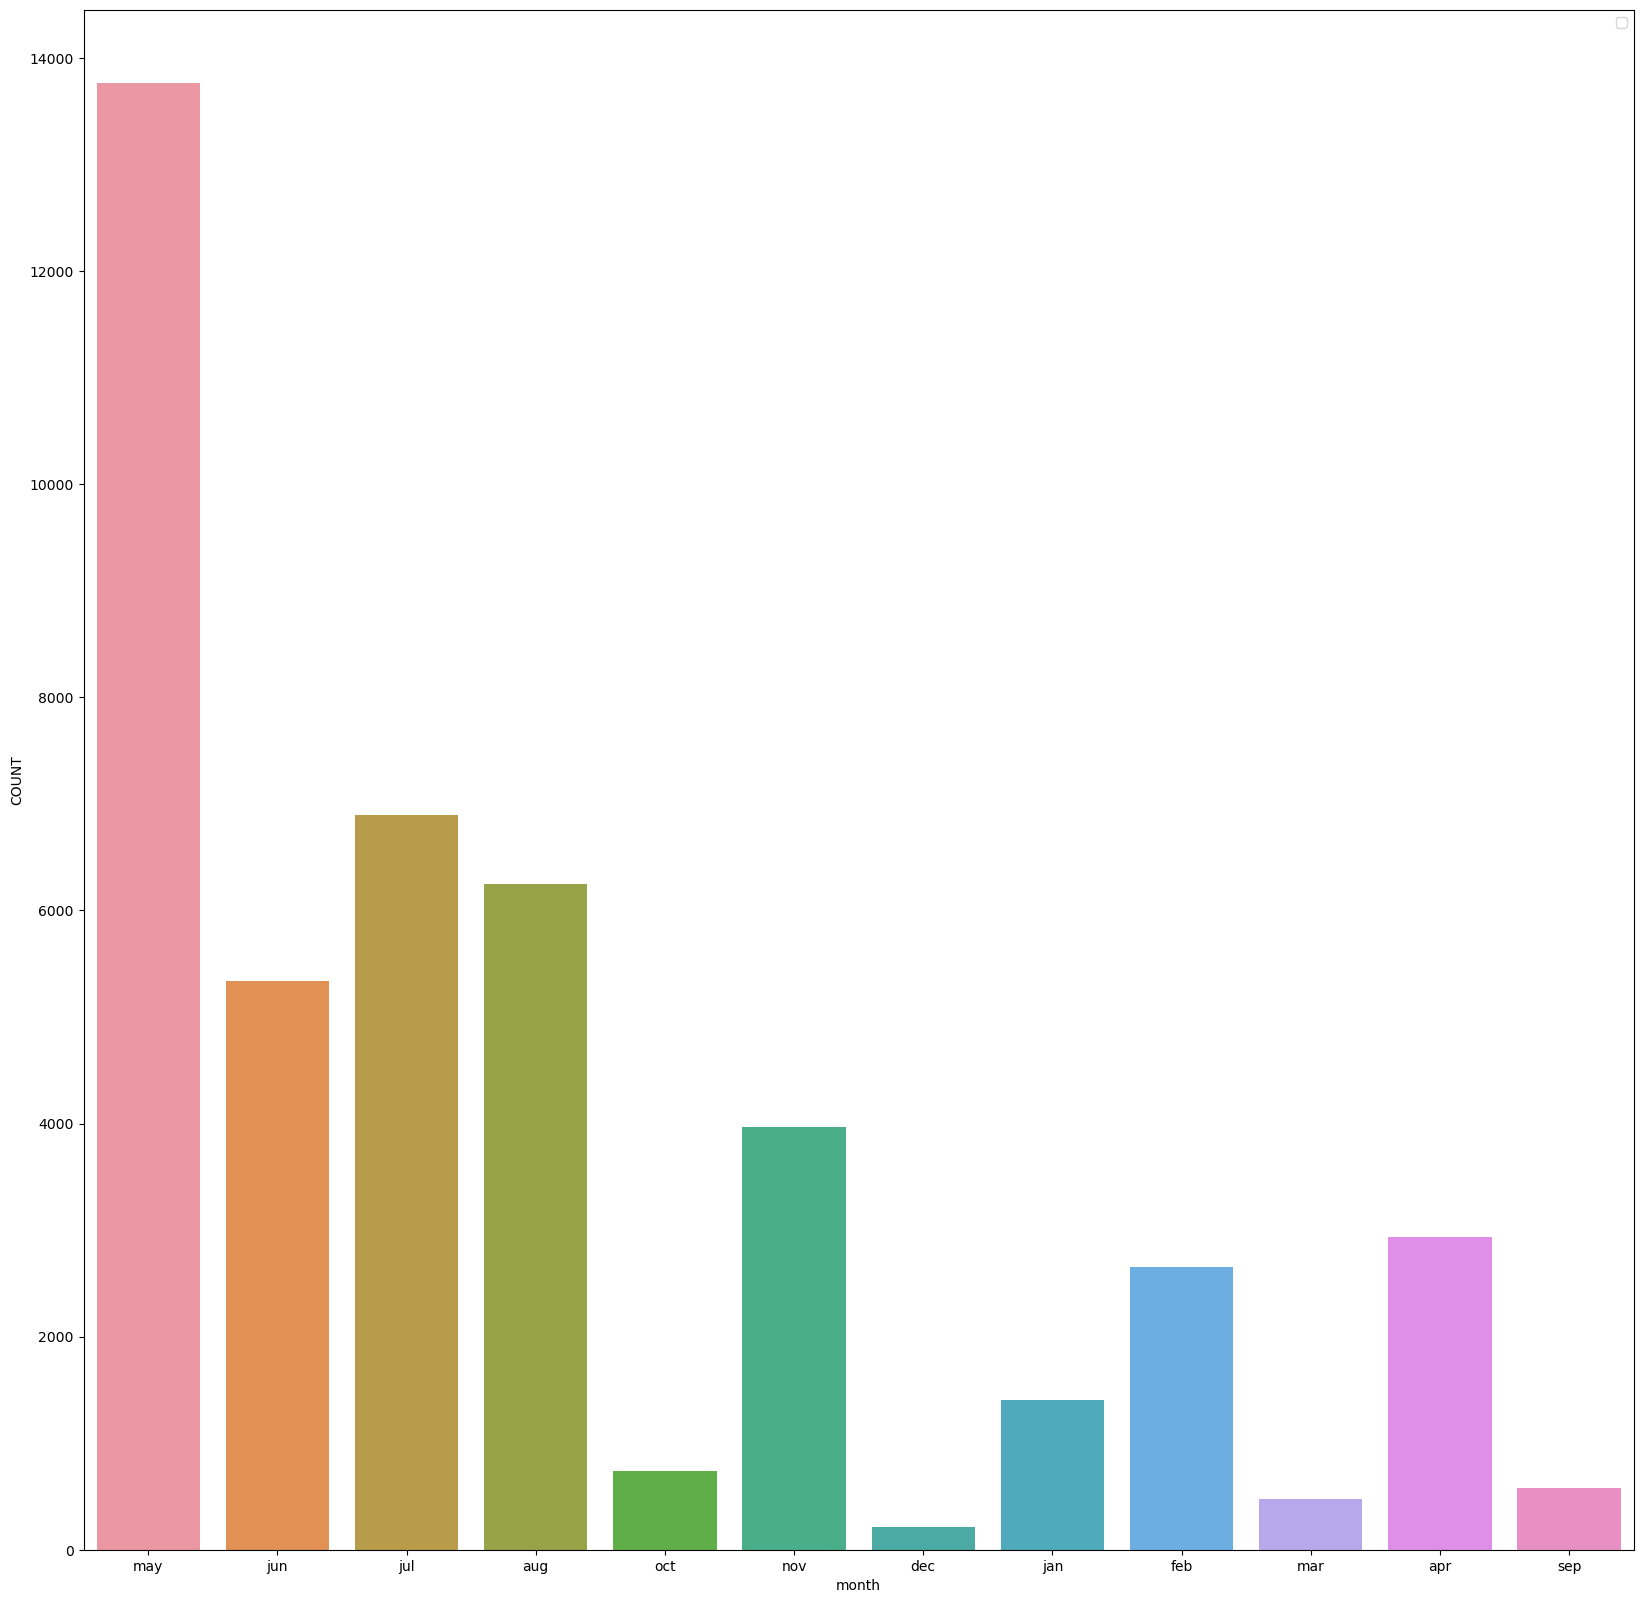

In [35]:
plt.subplots(figsize=(20,20))
sns.countplot(x='month',data=df)
plt.xlabel('month')
plt.ylabel('COUNT')
plt.legend()
plt.show()

In [36]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [37]:
#converting our target variable to  0 and 1 by mappping
df['y']=df['y'].map({'yes':1,'no':0})

In [38]:
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [39]:
#dropping contact column 
df.drop(['contact'],axis=1, inplace=True)


In [40]:
#assigning integer value to categorical data by mapping method
df['default']=df['default'].map({'yes':1,'no':0})
df['housing']=df['housing'].map({'yes':1,'no':0})
df['loan']=df['loan'].map({'yes':1,'no':0})
df['marital']=df['marital'].map({'married':1,'single':0,'divorced':2})
df['job']=df['job'].map({'management':0,'technician':1,'entrepreneur':2,'blue-collar':3,'unknown':4,'retired':5,
                         'admin':6,'services':7,'self-employed':8,'unemployed':9,'housemaid':10,'student':11})
df['month']=df['month'].map({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,
                         'july':6,'aug':7,'sept':8,'oct':9,'nov':10,'dec':11})
df['education']=df['education'].map({'tertiary ':1,'secondary':0,'unknown':3,'primary':2})


In [41]:
df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,NaN,0,2143,1,0,5,4.0,261,1,-1,0,unknown,0
1,44,1.0,0,0.0,0,29,1,0,5,4.0,151,1,-1,0,unknown,0
2,33,2.0,1,0.0,0,2,1,1,5,4.0,76,1,-1,0,unknown,0
3,47,3.0,1,3.0,0,1506,1,0,5,4.0,92,1,-1,0,unknown,0
4,33,4.0,0,3.0,0,1,0,0,5,4.0,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1.0,1,NaN,0,825,0,0,17,10.0,977,3,-1,0,unknown,1
45207,71,5.0,2,2.0,0,1729,0,0,17,10.0,456,2,-1,0,unknown,1
45208,72,5.0,1,0.0,0,5715,0,0,17,10.0,1127,5,184,3,success,1
45209,57,3.0,1,0.0,0,668,0,0,17,10.0,508,4,-1,0,unknown,0


In [42]:
#using label encoding to transform float to integer 
#i tried using one hot encoding but i was getting error so proceeded with this
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['job']=le.fit_transform(df['job'])
df['education']=le.fit_transform(df['education'])
df['month']=le.fit_transform(df['month'])
df['poutcome']=le.fit_transform(df['poutcome'])

In [43]:
df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,3,0,2143,1,0,5,4,261,1,-1,0,3,0
1,44,1,0,0,0,29,1,0,5,4,151,1,-1,0,3,0
2,33,2,1,0,0,2,1,1,5,4,76,1,-1,0,3,0
3,47,3,1,2,0,1506,1,0,5,4,92,1,-1,0,3,0
4,33,4,0,2,0,1,0,0,5,4,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,3,0,825,0,0,17,8,977,3,-1,0,3,1
45207,71,5,2,1,0,1729,0,0,17,8,456,2,-1,0,3,1
45208,72,5,1,0,0,5715,0,0,17,8,1127,5,184,3,2,1
45209,57,3,1,0,0,668,0,0,17,8,508,4,-1,0,3,0


Now we can procced to model Building as every column is tranformed into int type

In [44]:
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
y            int64
dtype: object

# plotting Outlier

age             AxesSubplot(0.125,0.53;0.0596154x0.35)
job          AxesSubplot(0.196538,0.53;0.0596154x0.35)
marital      AxesSubplot(0.268077,0.53;0.0596154x0.35)
education    AxesSubplot(0.339615,0.53;0.0596154x0.35)
default      AxesSubplot(0.411154,0.53;0.0596154x0.35)
balance      AxesSubplot(0.482692,0.53;0.0596154x0.35)
housing      AxesSubplot(0.554231,0.53;0.0596154x0.35)
loan         AxesSubplot(0.625769,0.53;0.0596154x0.35)
day          AxesSubplot(0.697308,0.53;0.0596154x0.35)
month        AxesSubplot(0.768846,0.53;0.0596154x0.35)
duration     AxesSubplot(0.840385,0.53;0.0596154x0.35)
campaign        AxesSubplot(0.125,0.11;0.0596154x0.35)
pdays        AxesSubplot(0.196538,0.11;0.0596154x0.35)
previous     AxesSubplot(0.268077,0.11;0.0596154x0.35)
poutcome     AxesSubplot(0.339615,0.11;0.0596154x0.35)
y            AxesSubplot(0.411154,0.11;0.0596154x0.35)
dtype: object

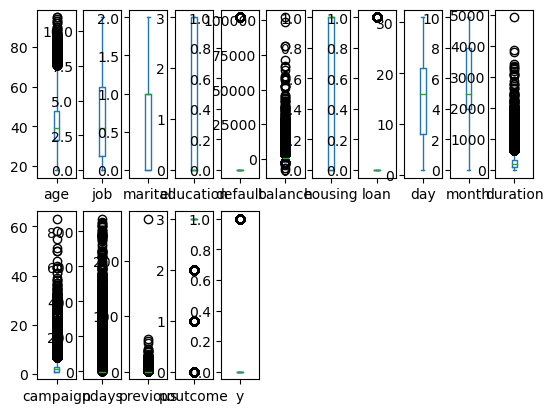

In [45]:
df.plot(kind='box',subplots=True,layout=(2,11))

Observation:There are outliers present here so now we are going to remove the outliers by zscore 

In [46]:
#removing outlier by z score
from scipy.stats import zscore
z=np.abs(zscore(df))

In [47]:
threshold=3
print(np.where(z>3))

(array([    7,    34,    37, ..., 45204, 45208, 45210], dtype=int64), array([ 4,  5, 10, ..., 13, 10, 13], dtype=int64))


In [48]:
df_new=df[(z<3).all(axis=1)]

In [49]:
print(df_new.shape)
print(df.shape)

(39456, 16)
(45211, 16)


Outlier have been removed

In [50]:
Percentloss=(45211-39456)/45211*100

In [51]:
Percentloss

12.729203070049325

# Checking Skewness

C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


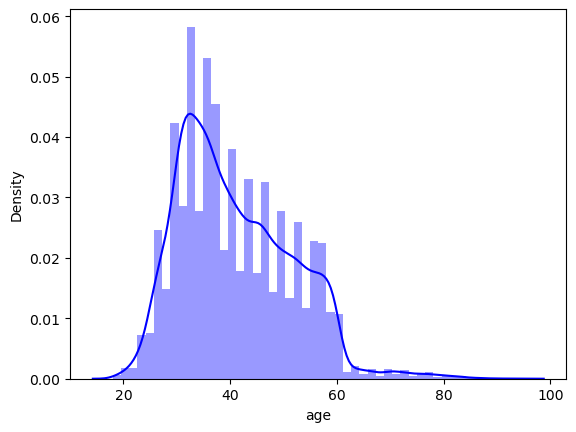

C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


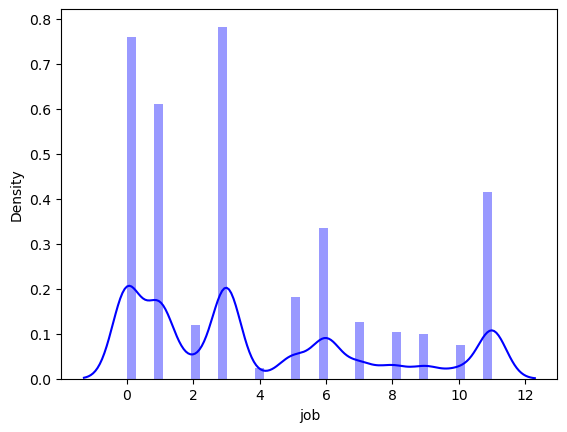

C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


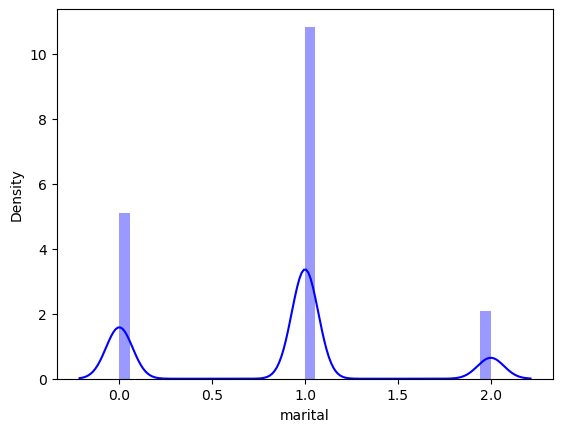

C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


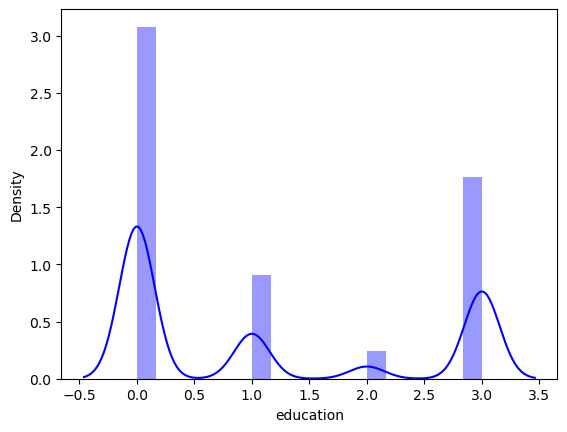

C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


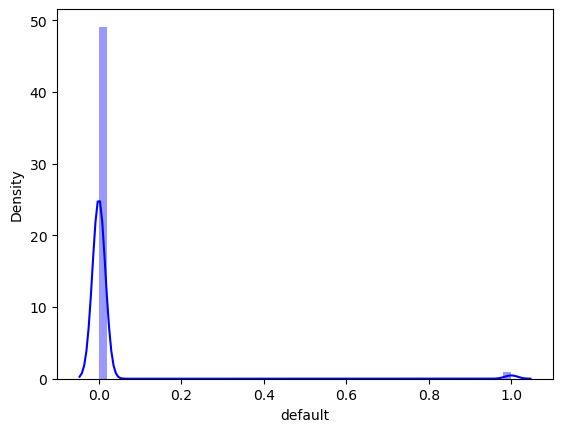

C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


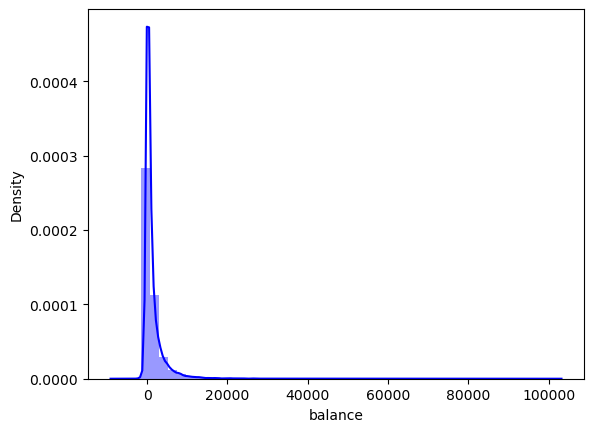

C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


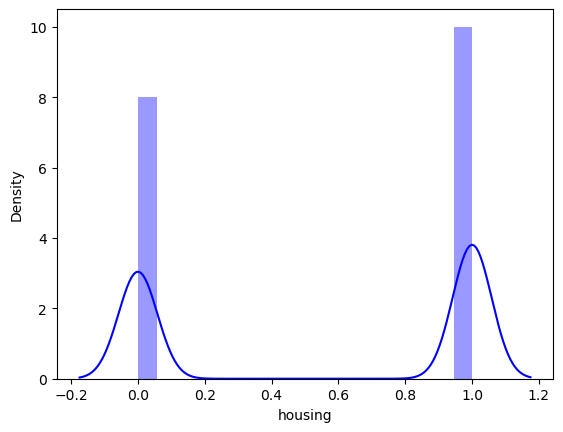

C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


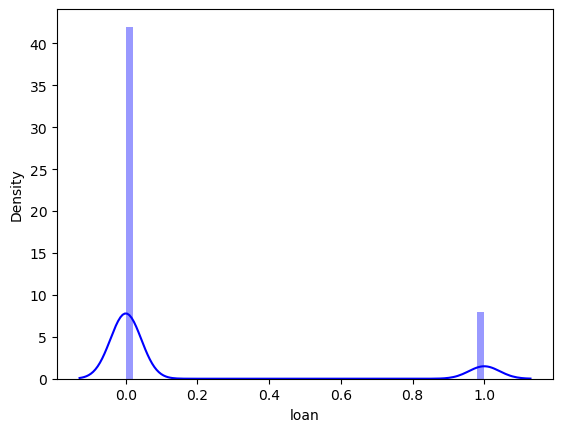

C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


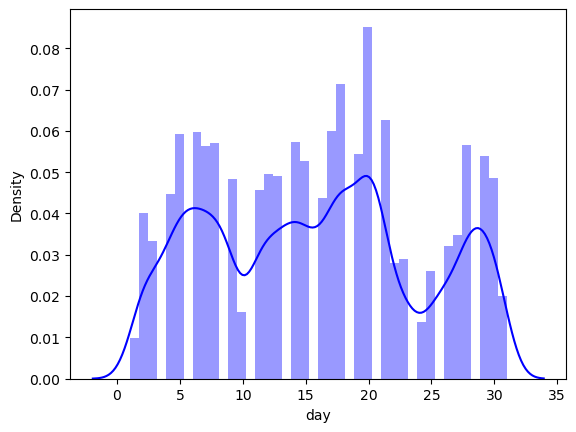

C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


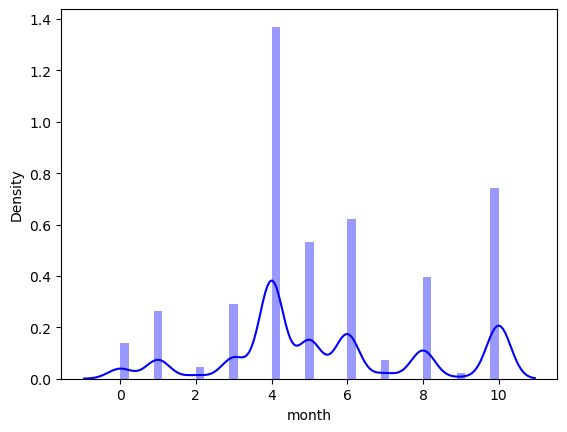

C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


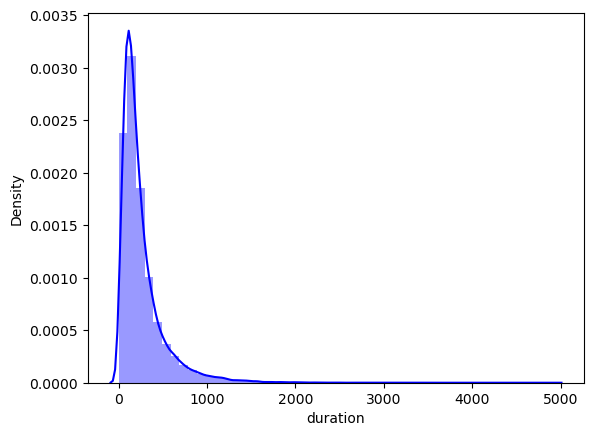

C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


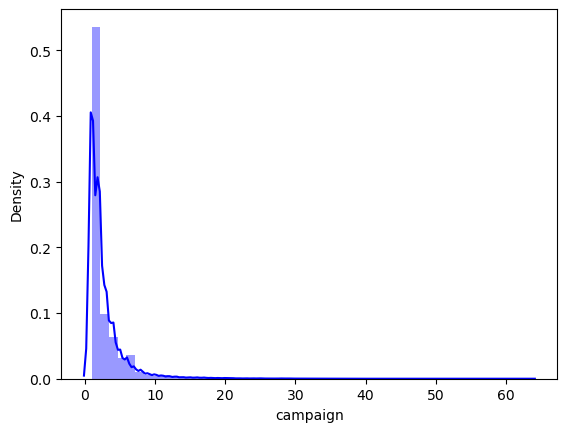

C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


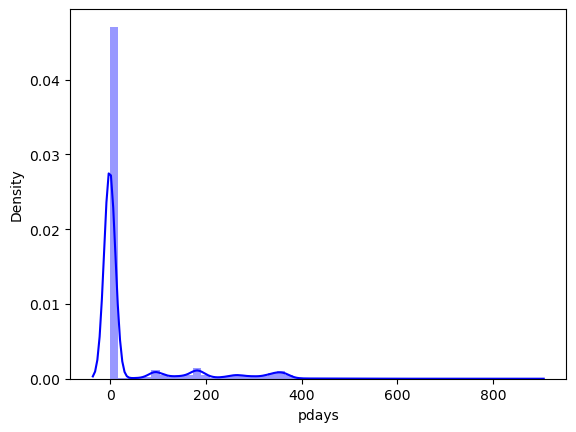

C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


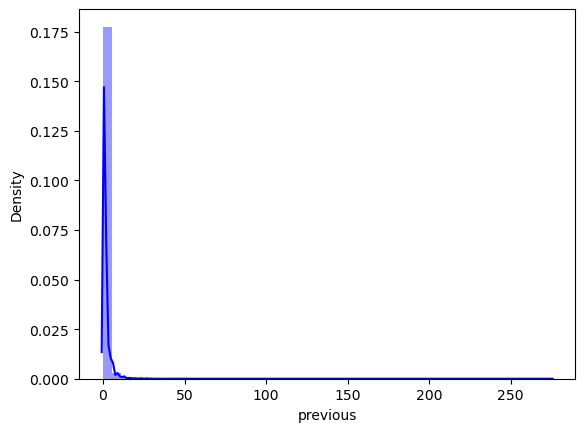

C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


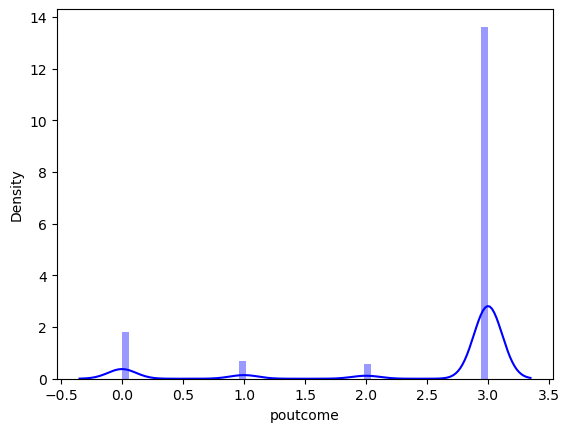

C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


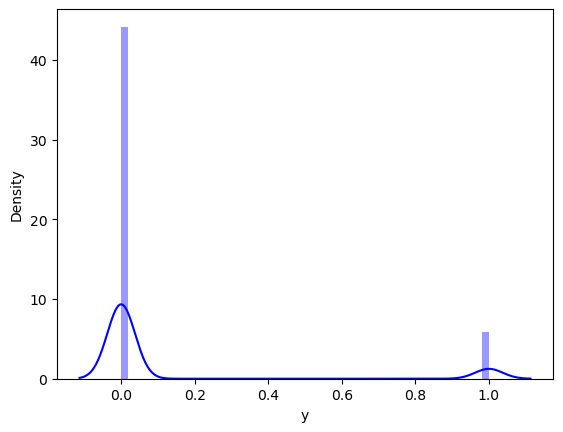

In [52]:
#Checking Skewness
for col in df.describe().columns:
    sns.distplot(df[col],color='b')
    plt.show()

# Feature Selection

In [56]:
#feature selection 
x=df.drop(columns=['y'],axis=1)
y=df['y']

In [57]:
x

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,58,0,1,3,0,2143,1,0,5,4,261,1,-1,0,3
1,44,1,0,0,0,29,1,0,5,4,151,1,-1,0,3
2,33,2,1,0,0,2,1,1,5,4,76,1,-1,0,3
3,47,3,1,2,0,1506,1,0,5,4,92,1,-1,0,3
4,33,4,0,2,0,1,0,0,5,4,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,3,0,825,0,0,17,8,977,3,-1,0,3
45207,71,5,2,1,0,1729,0,0,17,8,456,2,-1,0,3
45208,72,5,1,0,0,5715,0,0,17,8,1127,5,184,3,2
45209,57,3,1,0,0,668,0,0,17,8,508,4,-1,0,3


In [58]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [59]:
#removing skewness
from sklearn.preprocessing import power_transform

In [60]:
x=power_transform(x,method='yeo-johnson')
print(x)

[[ 1.4736367  -1.4301802   0.31283847 ... -0.47253275 -0.47249982
   0.46981044]
 [ 0.42937915 -0.70206296 -1.40653118 ... -0.47253275 -0.47249982
   0.46981044]
 [-0.70987329 -0.24557791  0.31283847 ... -0.47253275 -0.47249982
   0.46981044]
 ...
 [ 2.25723741  0.59113968  0.31283847 ...  2.12238101  2.16662976
  -1.5810371 ]
 [ 1.4093269   0.09280562  0.31283847 ... -0.47253275 -0.47249982
   0.46981044]
 [-0.25046885 -0.24557791  0.31283847 ...  2.12305137  2.17551888
  -2.15658425]]


# Normalizing data

In [62]:
#Normalizing data
from sklearn.preprocessing import StandardScaler

In [63]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [64]:
x

array([[ 1.4736367 , -1.4301802 ,  0.31283847, ..., -0.47253275,
        -0.47249982,  0.46981044],
       [ 0.42937915, -0.70206296, -1.40653118, ..., -0.47253275,
        -0.47249982,  0.46981044],
       [-0.70987329, -0.24557791,  0.31283847, ..., -0.47253275,
        -0.47249982,  0.46981044],
       ...,
       [ 2.25723741,  0.59113968,  0.31283847, ...,  2.12238101,
         2.16662976, -1.5810371 ],
       [ 1.4093269 ,  0.09280562,  0.31283847, ..., -0.47253275,
        -0.47249982,  0.46981044],
       [-0.25046885, -0.24557791,  0.31283847, ...,  2.12305137,
         2.17551888, -2.15658425]])

# Building Machine Learning Model

In [65]:
#spiltting data in train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42,stratify=y)

In [66]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22605, 15)
(22606, 15)
(22605,)
(22606,)


In [67]:
#importing all libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#importing boosting Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#importing error metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [68]:
model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),
      AdaBoostClassifier(),GradientBoostingClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of ',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('***************************************************************************************************************')
    print('/n')

accuracy score of  LogisticRegression() is:
0.8985667521896842
[[19527   434]
 [ 1859   786]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     19961
           1       0.64      0.30      0.41      2645

    accuracy                           0.90     22606
   macro avg       0.78      0.64      0.68     22606
weighted avg       0.88      0.90      0.88     22606

***************************************************************************************************************
/n
accuracy score of  SVC() is:
0.8974608511014774
[[19755   206]
 [ 2112   533]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     19961
           1       0.72      0.20      0.32      2645

    accuracy                           0.90     22606
   macro avg       0.81      0.60      0.63     22606
weighted avg       0.88      0.90      0.87     22606

**********************************************************

# Cross validation model

In [69]:
cvscore=cross_val_score(LogisticRegression(),x,y,cv=2,scoring='accuracy')
print(cvscore)
print('mean:',cvscore.mean())
print('standard deviation:',cvscore.std())

[0.88901177 0.6473789 ]
mean: 0.7681953326306837
standard deviation: 0.1208164341568948


In [70]:
cvscore=cross_val_score(RandomForestClassifier(),x,y,cv=2,scoring='accuracy')
print(cvscore)
print('mean:',cvscore.mean())
print('standard deviation:',cvscore.std())

[0.82840839 0.47591241]
mean: 0.6521603979564885
standard deviation: 0.17624798919736445


In [71]:
cvscore=cross_val_score(SVC(),x,y,cv=2,scoring='accuracy')
print(cvscore)
print('mean:',cvscore.mean())
print('standard deviation:',cvscore.std())

[0.88534018 0.55823933]
mean: 0.7217897513785628
standard deviation: 0.16355042379616958


In [72]:
cvscore=cross_val_score(GradientBoostingClassifier(),x,y,cv=2,scoring='accuracy')
print(cvscore)
print('mean:',cvscore.mean())
print('standard deviation:',cvscore.std())

[0.85716182 0.3845167 ]
mean: 0.6208392576461967
standard deviation: 0.23632255780102968


In [73]:
cvscore=cross_val_score(DecisionTreeClassifier(),x,y,cv=2,scoring='accuracy')
print(cvscore)
print('mean:',cvscore.mean())
print('standard deviation:',cvscore.std())

[0.70631691 0.37407653]
mean: 0.5401967193783009
standard deviation: 0.16612018763753558


# Logistic Regression

In [74]:
lg=LogisticRegression()
gridcv={"C":10*np.arange(-2,3),"penalty":["l1","l2"]}
cv=KFold(n_splits=20,random_state=None,shuffle=False)

In [75]:
clf=GridSearchCV(lg,gridcv,cv=cv,n_jobs=2,scoring="f1_macro")
clf.fit(x_train,y_train)

C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\envs\bank\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, 

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=2,
             param_grid={'C': array([-20, -10,   0,  10,  20]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [76]:
predclf_train=clf.predict(x_train)
print('Training Accuarcy is:',(accuracy_score(y_train,predclf_train)))
predclf_test=clf.predict(x_test)
print("Training Accuracy is :",(accuracy_score(y_test,predclf_test)))
print(confusion_matrix(y_test,predclf_test))
print(classification_report(y_test,predclf_test))

Training Accuarcy is: 0.8977217429772174
Training Accuracy is : 0.8987879324073255
[[19527   434]
 [ 1854   791]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     19961
           1       0.65      0.30      0.41      2645

    accuracy                           0.90     22606
   macro avg       0.78      0.64      0.68     22606
weighted avg       0.88      0.90      0.88     22606



In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc_train=rfc.predict(x_train)
print("Training Accuracy is :",(accuracy_score(y_train,predrfc_train)))
predrfc_test=rfc.predict(x_test)
print("Test Accuarcy is:",(accuracy_score(y_test,predrfc_test)))
print(confusion_matrix(y_test,predrfc_test))
print(classification_report(y_test,predrfc_test))

Training Accuracy is : 0.9999557619995576
Test Accuarcy is: 0.9030788286295673
[[19464   497]
 [ 1694   951]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     19961
           1       0.66      0.36      0.46      2645

    accuracy                           0.90     22606
   macro avg       0.79      0.67      0.71     22606
weighted avg       0.89      0.90      0.89     22606



Going with RandomForestClassifier as it gives the best score

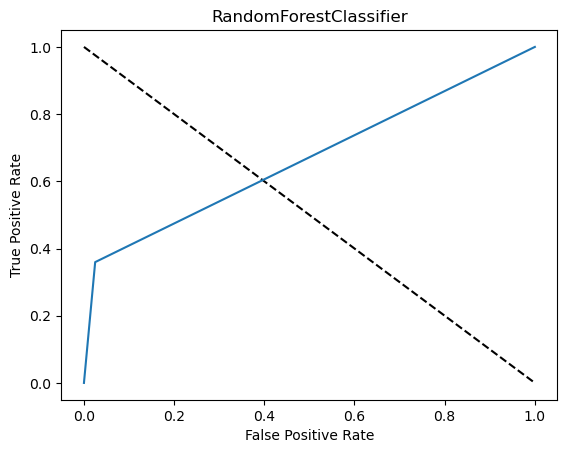

In [78]:
#plottingthe graph by area under the curve
from sklearn.metrics import roc_curve,roc_auc_score,auc
fpr,tpr,threshold=roc_curve(y_test,predrfc_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0], 'k--')
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RandomForestClassifier")
plt.show()

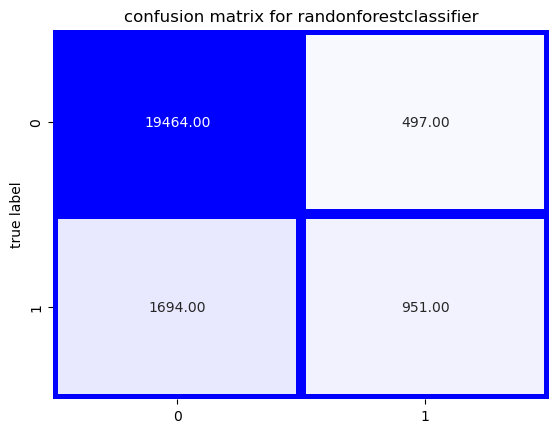

In [79]:
#plotting confusion matrix
cm=confusion_matrix(y_test,rfc.predict(x_test))
ax=plt.subplot()
sns.heatmap(cm,annot=True,cbar=False,ax=ax,linewidths=6,linecolor="b",center=0,fmt='.2f',cmap='bwr_r')
ax.set_label("prediction");ax.set_ylabel("true label")
plt.title("confusion matrix for randonforestclassifier")
plt.show()

Conclusion:[1]Our dataset consist of categorical and numeric features
[2]The month of may have the highest number of clients
[3]The least number of clients are in the dec month which says the end of the year there are less clients
[4]as we can see there are more number of clients btw the age of 30-60
[5]there are less number of defaulter
[6]Blue collor and management job people clients are more in munber
[7]Married clients are more 
[8]different model have been trained and tested ,out of which i am going with randomforestclssifier

In [80]:
import pickle

In [81]:
filename='bank-full.csv'
pickle.dump(rfc,open(filename,'wb'))

In [82]:
a=np.array(y_test)

In [83]:
predicted=np.array(rfc.predict(x_test))

In [84]:
df_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))

In [85]:
df_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
22601,0,0
22602,0,0
22603,0,0
22604,1,1
